# Read Directly from IIASA Data Resources

IIASA's new [scenario explorer](https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/workspaces) is not only a great resource on its own, but it also allows the underlying datasets to be directly queried. `pyam`  takes advantage of this ability to allow you to easily pull data and work with it.

In [1]:
import pyam

<IPython.core.display.Javascript object>

Accessing an explorer is done via a `Connection` object. By default, all public explorers can be connected to. 

In [2]:
conn = pyam.iiasa.Connection()
conn.valid_connections

['IXSE_SETNAV', 'IXSE_SR15', 'IXSE_SR15_QA', 'IXSE_TEST_PUBLIC']

If you have additional credentials, you can supply them as well via the `creds` key-word argument:

```
pyam.iiasa.Connection(creds=(<username>, <password>))
```

In this example, we will be pulling data from the Special Report on 1.5C explorer. This can be done either via the constructor:

```
pyam.iiasa.Connection('IXSE_SR15')
```

or, if you want to query multiple databases, via the explicit `connect()` method:

```
conn = pyam.iiasa.Connection()
conn.connect('IXSE_SR15')
```

We also provide some convenience functions to shorten the amount of code you have to write. Under the hood, `read_iiasa()` is just opening an connection to a database and making a query on that data.
In this tutorial, we will query specific subsets of data in a manner similar to `pyam.IamDataFrame.filter()`.

In [3]:
df = pyam.read_iiasa(
    'IXSE_SR15',
    model='MESSAGEix*', 
    variable=['Emissions|CO2', 'Primary Energy|Coal'], 
    region='World',
    meta=['category']
)

INFO:root:You are connected to the IXSE_SR15 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/about.


Here we pulled out all times series data for model(s) that start with 'MESSAGEix' that are in the 'World' region and associated with the two named variables. We also added the "category" metadata, which tells us the climate impact categorisation of each scenario as assessed in the IPCC SR15.

Let's plot CO2 emissions.

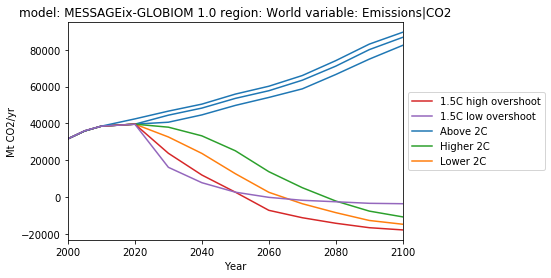

In [4]:
ax = df.filter(variable='Emissions|CO2').line_plot(
    color='category', 
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)

And now continue doing all of your analysis!

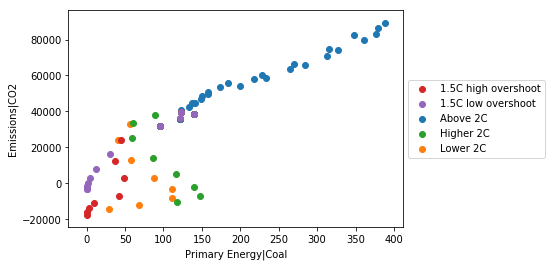

In [5]:
ax = df.scatter(
    x='Primary Energy|Coal', 
    y='Emissions|CO2', 
    color='category',
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)

## Exploring the Data Source

If you're interested in what data is actually in the data source, you can use `pyam.iiasa.Connection` to do so.

In [6]:
conn = pyam.iiasa.Connection('IXSE_SR15')

INFO:root:You are connected to the IXSE_SR15 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/iamc-1.5c-explorer/#/about.


The `conn` object has a number of useful functions for listing what's in the dataset. A few of them are shown below.

In [7]:
conn.models().head()

0        AIM/CGE 2.0
1        AIM/CGE 2.1
2      C-ROADS-5.005
3           GCAM 4.2
4    GENeSYS-MOD 1.0
Name: model, dtype: object

In [8]:
conn.scenarios().head()

0    ADVANCE_2020_1.5C-2100
1        ADVANCE_2020_Med2C
2         ADVANCE_2020_WB2C
3        ADVANCE_2030_Med2C
4    ADVANCE_2030_Price1.5C
Name: scenario, dtype: object

In [9]:
conn.variables().head()

0    AR5 climate diagnostics|Concentration|CO2|FAIR...
1    AR5 climate diagnostics|Concentration|CO2|MAGI...
2    AR5 climate diagnostics|Forcing|Aerosol|Direct...
3    AR5 climate diagnostics|Forcing|Aerosol|MAGICC...
4    AR5 climate diagnostics|Forcing|Aerosol|Total|...
Name: variable, dtype: object

In [10]:
conn.regions().head()

0     World
1    R5ROWO
2    R5ASIA
3     R5LAM
4     R5MAF
Name: region, dtype: object

A number of different kinds of indicators are available for model/scenario combinations. We queried the `category` metadata in the above example, but there are many more. You can see them with

In [11]:
conn.available_metadata().head()

0       Kyoto-GHG|2010 (SAR)
1                   baseline
2          carbon price|2030
3    carbon price|2030 (NPV)
4          carbon price|2050
Name: name, dtype: object

You can directly query the `Connection`, which will give you a `pd.DataFrame`

In [12]:
df = conn.query(
    model='MESSAGEix*', 
    variable=['Emissions|CO2', 'Primary Energy|Coal'], 
    region='World'
)
df.head()

model region        scenario       unit        value  \
0  MESSAGEix-GLOBIOM 1.0  World  CD-LINKS_INDCi  Mt CO2/yr  31667.90819   
1  MESSAGEix-GLOBIOM 1.0  World  CD-LINKS_INDCi  Mt CO2/yr  35933.06970   
2  MESSAGEix-GLOBIOM 1.0  World  CD-LINKS_INDCi  Mt CO2/yr  38542.01816   
3  MESSAGEix-GLOBIOM 1.0  World  CD-LINKS_INDCi  Mt CO2/yr  39615.22255   
4  MESSAGEix-GLOBIOM 1.0  World  CD-LINKS_INDCi  Mt CO2/yr  40671.28065   

        variable  year  
0  Emissions|CO2  2000  
1  Emissions|CO2  2005  
2  Emissions|CO2  2010  
3  Emissions|CO2  2020  
4  Emissions|CO2  2030

And you can easily turn this into a `pyam.IamDataFrame` to continue your analysis.

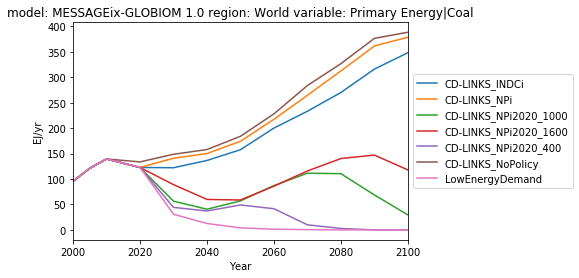

In [13]:
df = pyam.IamDataFrame(df)
ax = df.filter(variable='Primary Energy|Coal').line_plot(
    color='scenario', 
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)